In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data file
df = pd.read_csv("/content/drive/MyDrive/Dataset(ALL)/Datasets/breast-cancer.csv")

In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)

In [ ]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


# EDA: Exploratory Data Analysis

### Giải thích ý nghĩa của các biến:

- radius (Bán kính): Khoảng cách trung bình từ tâm đến các điểm trên đường viền nhân tế bào. Tế bào ung thư thường có nhân lớn hơn bình thường.
- texture (Độ nhám): Đo lường sự thay đổi mức xám trong các pixel ảnh. Nó mô tả bề mặt nhân tế bào mịn hay sần sùi.
- perimeter (Chu vi): Tổng chiều dài đường biên xung quanh nhân tế bào.
- area (Diện tích): Tổng diện tích của nhân tế bào. Đây là chỉ số quan trọng vì tế bào ác tính thường phình to ra.
- smoothness (Độ mượt): Tế bào lành tính thường tròn đều mượt, tế bào ác tính thường có cạnh sắc nhọn hoặc lồi lõm.
- compactness (Độ nén): Chỉ số này cho biết hình dạng tế bào có "gọn gàng" hay không. Tế bào ung thư thường có hình dạng kéo dài hoặc phức tạp.
- concavity (Độ lõm): Đo lường mức độ nghiêm trọng của các phần lõm trên đường viền nhân. Các hốc lõm sâu là dấu hiệu của sự phát triển bất thường.
- concave points (Số điểm lõm): Đếm số lượng các phần lõm trên đường viền. Càng nhiều điểm lõm thì hình dạng nhân tế bào càng biến dạng.
- symmetry (Độ đối xứng): Đo xem nếu chia đôi nhân tế bào thì hai nửa có giống nhau không. Tế bào ung thư thường phát triển lệch lạc và mất tính đối xứng.
- fractal dimension (Kích thước Fractal): Một chỉ số toán học mô tả độ phức tạp của đường biên. Đường biên càng nham nhở, gồ ghề thì chỉ số này càng cao.

### Các biến trên đều có 3 biến thể

- mean (Trung bình): Giá trị trung bình của tất cả các tế bào quan sát được trong mẫu sinh thiết. Nó cho cái nhìn tổng thể về khối u.

- se (Standard Error - Sai số): Đo lường sự khác biệt giữa các tế bào. Nếu radius_se cao, nghĩa là trong khối u có tế bào rất to nhưng cũng có tế bào nhỏ, sự phát triển không đồng nhất.

- worst (Tệ nhất): Đây là giá trị lớn nhất của đặc tính đó trong mẫu. Trong y khoa, đây là biến quan trọng nhất vì bác sĩ thường quan tâm đến những tế bào biến dị nặng nhất để đưa ra chẩn đoán ác tính.


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df[df["diagnosis"] == 1].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,1.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,0.193800,0.362100,1.334000,13.990000,0.002667,0.008422,0.011010,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,1.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,0.390375,0.892825,2.715500,35.762500,0.005085,0.019662,0.026998,0.011415,0.014615,0.002688,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,1.0,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,0.547200,1.102500,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205,0.017700,0.003739,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,1.0,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,0.757300,1.429250,5.206250,94.000000,0.007971,0.038910,0.050443,0.017497,0.022132,0.004892,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,1.0,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [ ]:
df[df["diagnosis"] == 0].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.22038,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.58918,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,0.0,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,0.111500,0.36020,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.0,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,0.207300,0.79590,1.445000,15.260000,0.005212,0.011320,0.010990,0.006433,0.015600,0.002074,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,0.0,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,0.257500,1.10800,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061,0.019090,0.002808,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,0.0,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,0.341600,1.49200,2.388000,25.030000,0.008534,0.025890,0.030560,0.011870,0.024060,0.004174,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,0.0,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,0.881100,4.88500,5.118000,77.110000,0.021770,0.106400,0.396000,0.052790,0.061460,0.029840,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [ ]:
for column in X.columns:
    max_value = X[column].max()
    max_index = X[column].idxmax() # trả lại ví trị dòng có giá trị max
    corresponding_diagnosis = df.loc[max_index, 'diagnosis']
    print(f"Cột {column} có giá trị cao nhất = {max_value:4f}, Diagnosis: {corresponding_diagnosis}")

Cột radius_mean có giá trị cao nhất = 28.110000, Diagnosis: 1
Cột texture_mean có giá trị cao nhất = 39.280000, Diagnosis: 1
Cột perimeter_mean có giá trị cao nhất = 188.500000, Diagnosis: 1
Cột area_mean có giá trị cao nhất = 2501.000000, Diagnosis: 1
Cột smoothness_mean có giá trị cao nhất = 0.163400, Diagnosis: 0
Cột compactness_mean có giá trị cao nhất = 0.345400, Diagnosis: 1
Cột concavity_mean có giá trị cao nhất = 0.426800, Diagnosis: 1
Cột concave points_mean có giá trị cao nhất = 0.201200, Diagnosis: 1
Cột symmetry_mean có giá trị cao nhất = 0.304000, Diagnosis: 1
Cột fractal_dimension_mean có giá trị cao nhất = 0.097440, Diagnosis: 1
Cột radius_se có giá trị cao nhất = 2.873000, Diagnosis: 1
Cột texture_se có giá trị cao nhất = 4.885000, Diagnosis: 0
Cột perimeter_se có giá trị cao nhất = 21.980000, Diagnosis: 1
Cột area_se có giá trị cao nhất = 542.200000, Diagnosis: 1
Cột smoothness_se có giá trị cao nhất = 0.031130, Diagnosis: 1
Cột compactness_se có giá trị cao nhất = 0.1

In [ ]:
for column in X.columns:
    min_value = X[column].min()
    min_index = X[column].idxmin() # trả lại ví trị dòng có giá trị min
    corresponding_diagnosis = df.loc[min_index, 'diagnosis']
    print(f"Cột {column} có giá trị thấp nhất = {min_value:4f}, Diagnosis: {corresponding_diagnosis}")

Cột radius_mean có giá trị thấp nhất = 6.981000, Diagnosis: 0
Cột texture_mean có giá trị thấp nhất = 9.710000, Diagnosis: 0
Cột perimeter_mean có giá trị thấp nhất = 43.790000, Diagnosis: 0
Cột area_mean có giá trị thấp nhất = 143.500000, Diagnosis: 0
Cột smoothness_mean có giá trị thấp nhất = 0.052630, Diagnosis: 0
Cột compactness_mean có giá trị thấp nhất = 0.019380, Diagnosis: 0
Cột concavity_mean có giá trị thấp nhất = 0.000000, Diagnosis: 0
Cột concave points_mean có giá trị thấp nhất = 0.000000, Diagnosis: 0
Cột symmetry_mean có giá trị thấp nhất = 0.106000, Diagnosis: 0
Cột fractal_dimension_mean có giá trị thấp nhất = 0.049960, Diagnosis: 1
Cột radius_se có giá trị thấp nhất = 0.111500, Diagnosis: 0
Cột texture_se có giá trị thấp nhất = 0.360200, Diagnosis: 0
Cột perimeter_se có giá trị thấp nhất = 0.757000, Diagnosis: 0
Cột area_se có giá trị thấp nhất = 6.802000, Diagnosis: 0
Cột smoothness_se có giá trị thấp nhất = 0.001713, Diagnosis: 0
Cột compactness_se có giá trị thấp n

In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


diagnosis
0    357
1    212
Name: count, dtype: int64


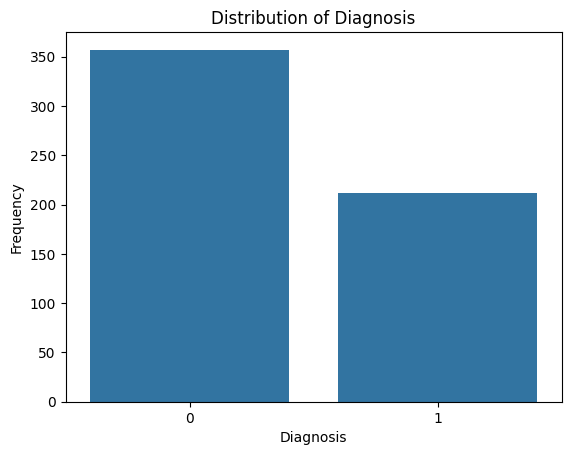

In [ ]:
print(y.value_counts())
sns.countplot(x=y)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()


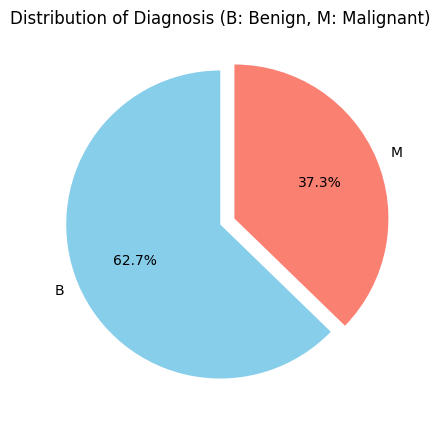

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(y.value_counts(), explode= [0,0.1], labels= ["B", "M" ], colors= ['skyblue','salmon'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diagnosis (B: Benign, M: Malignant)')
plt.show()

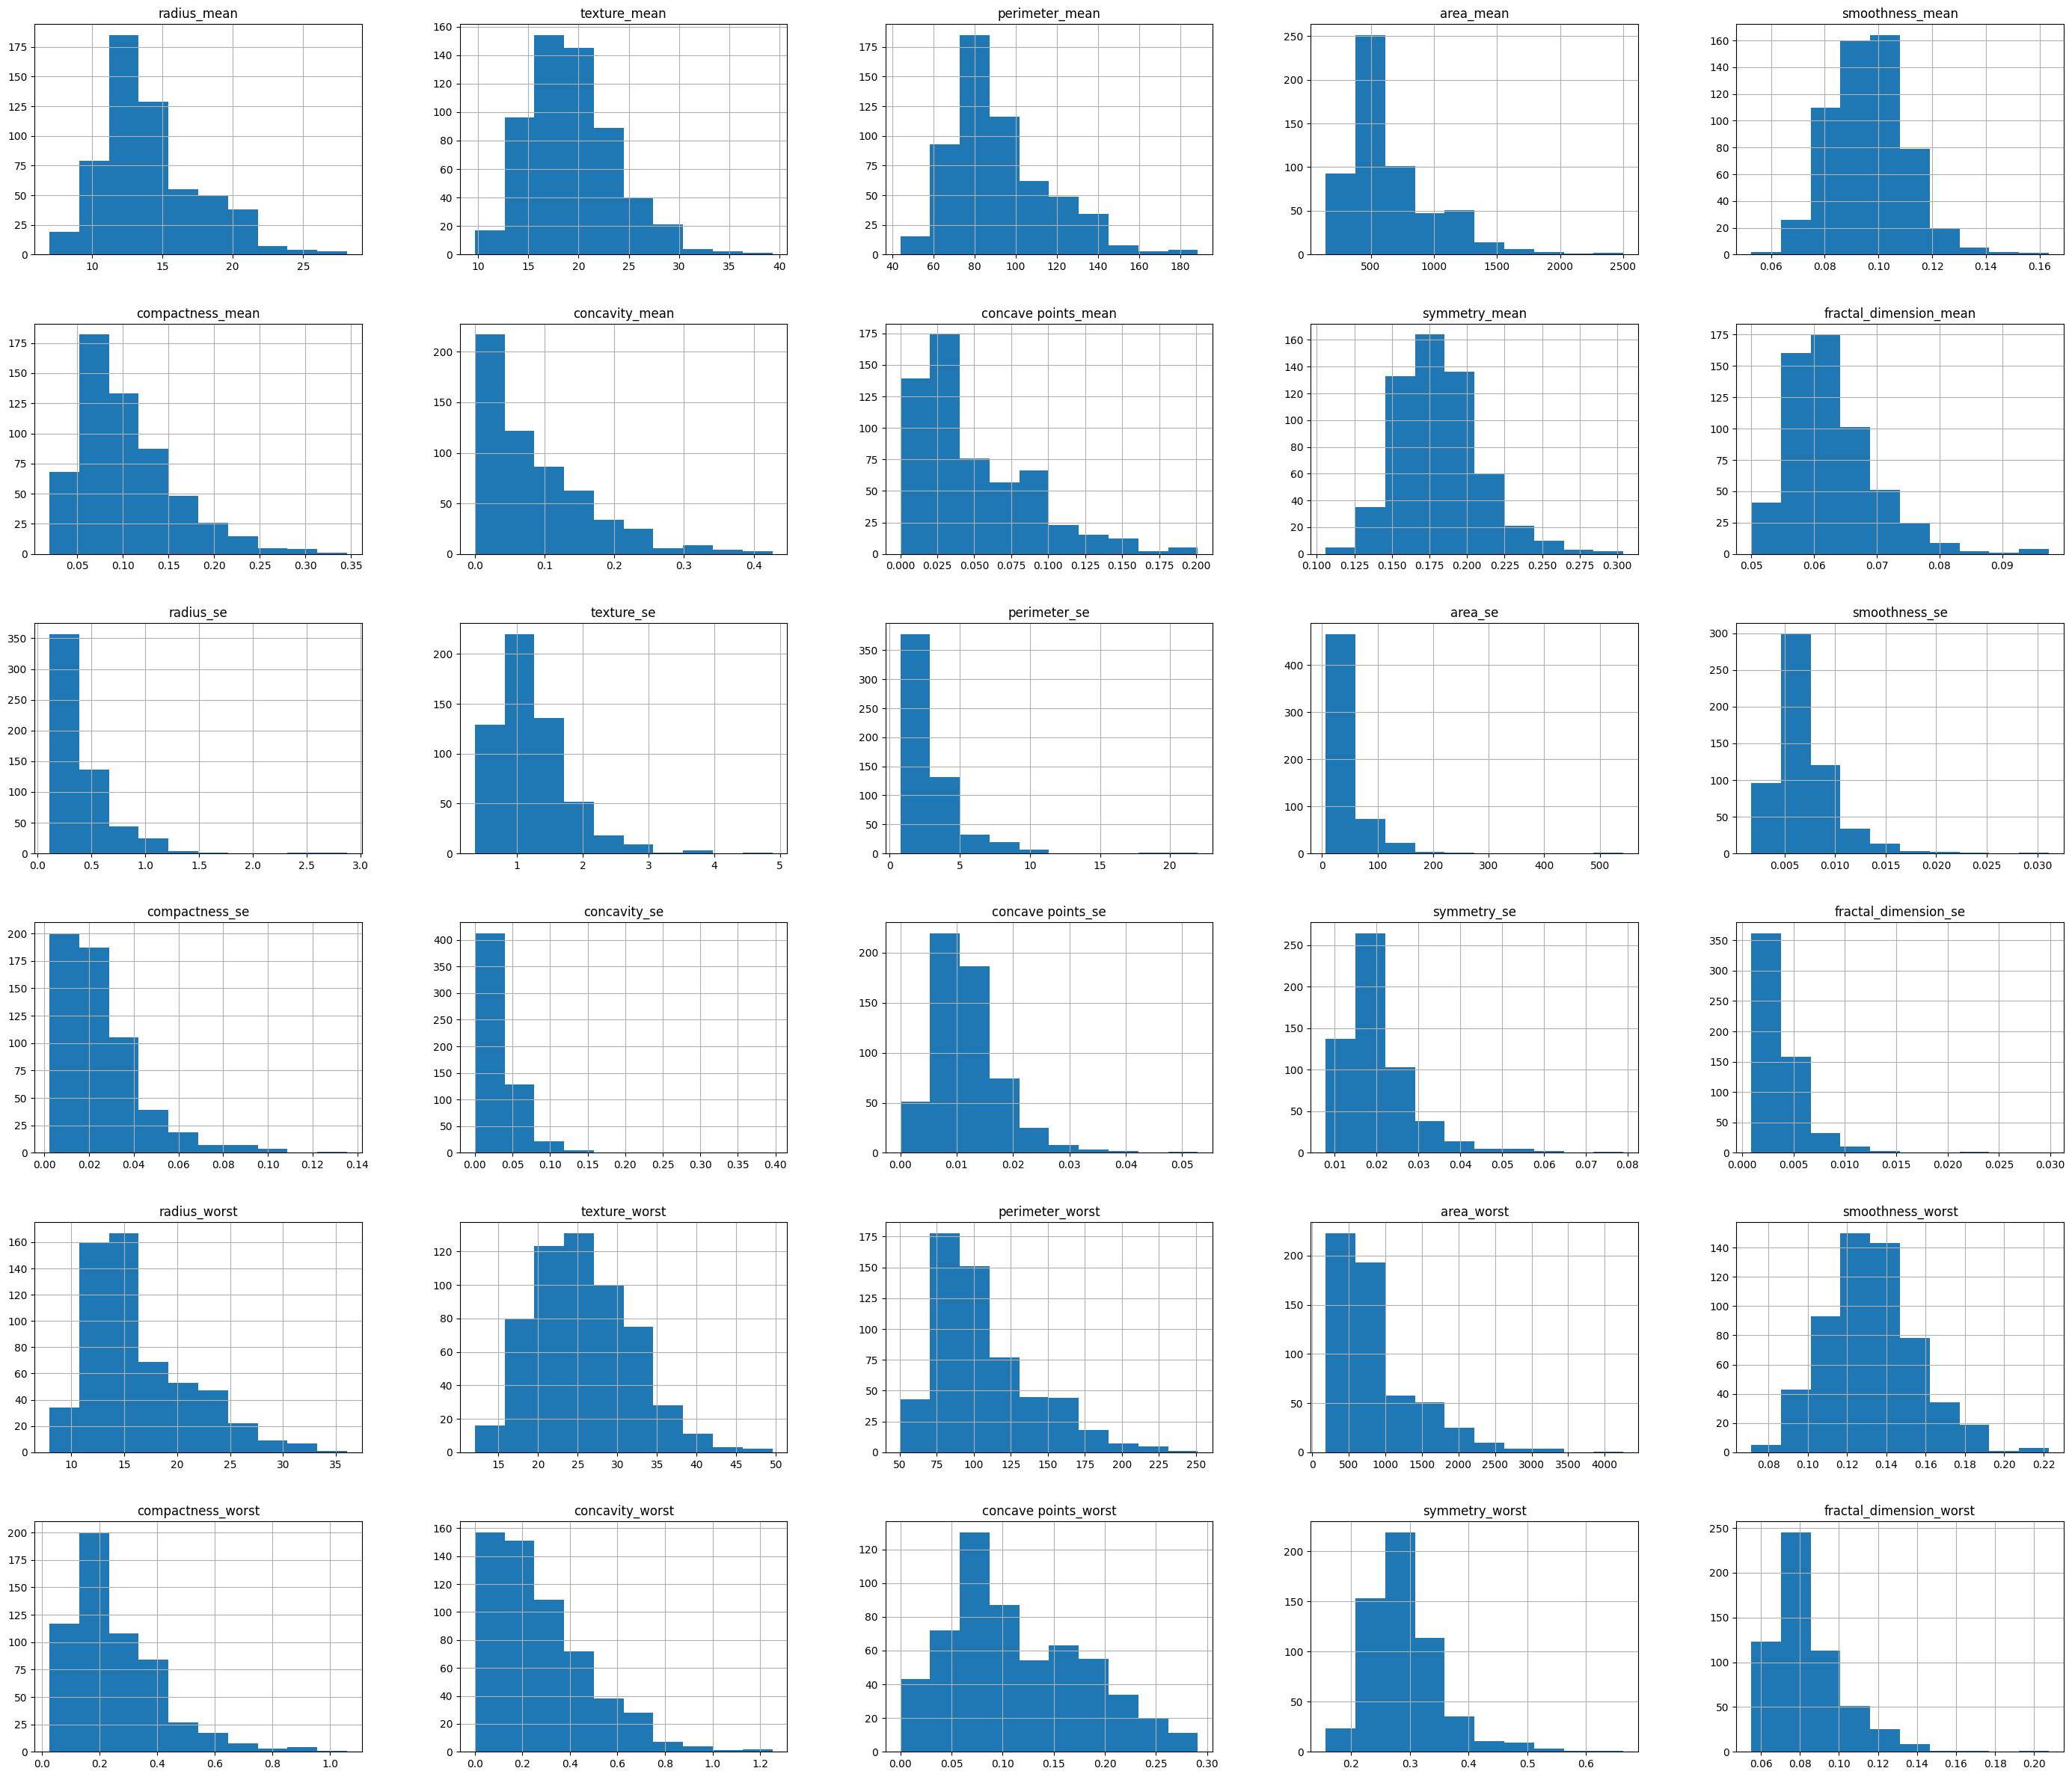

In [ ]:
X.hist(figsize = (35,30))
plt.show()

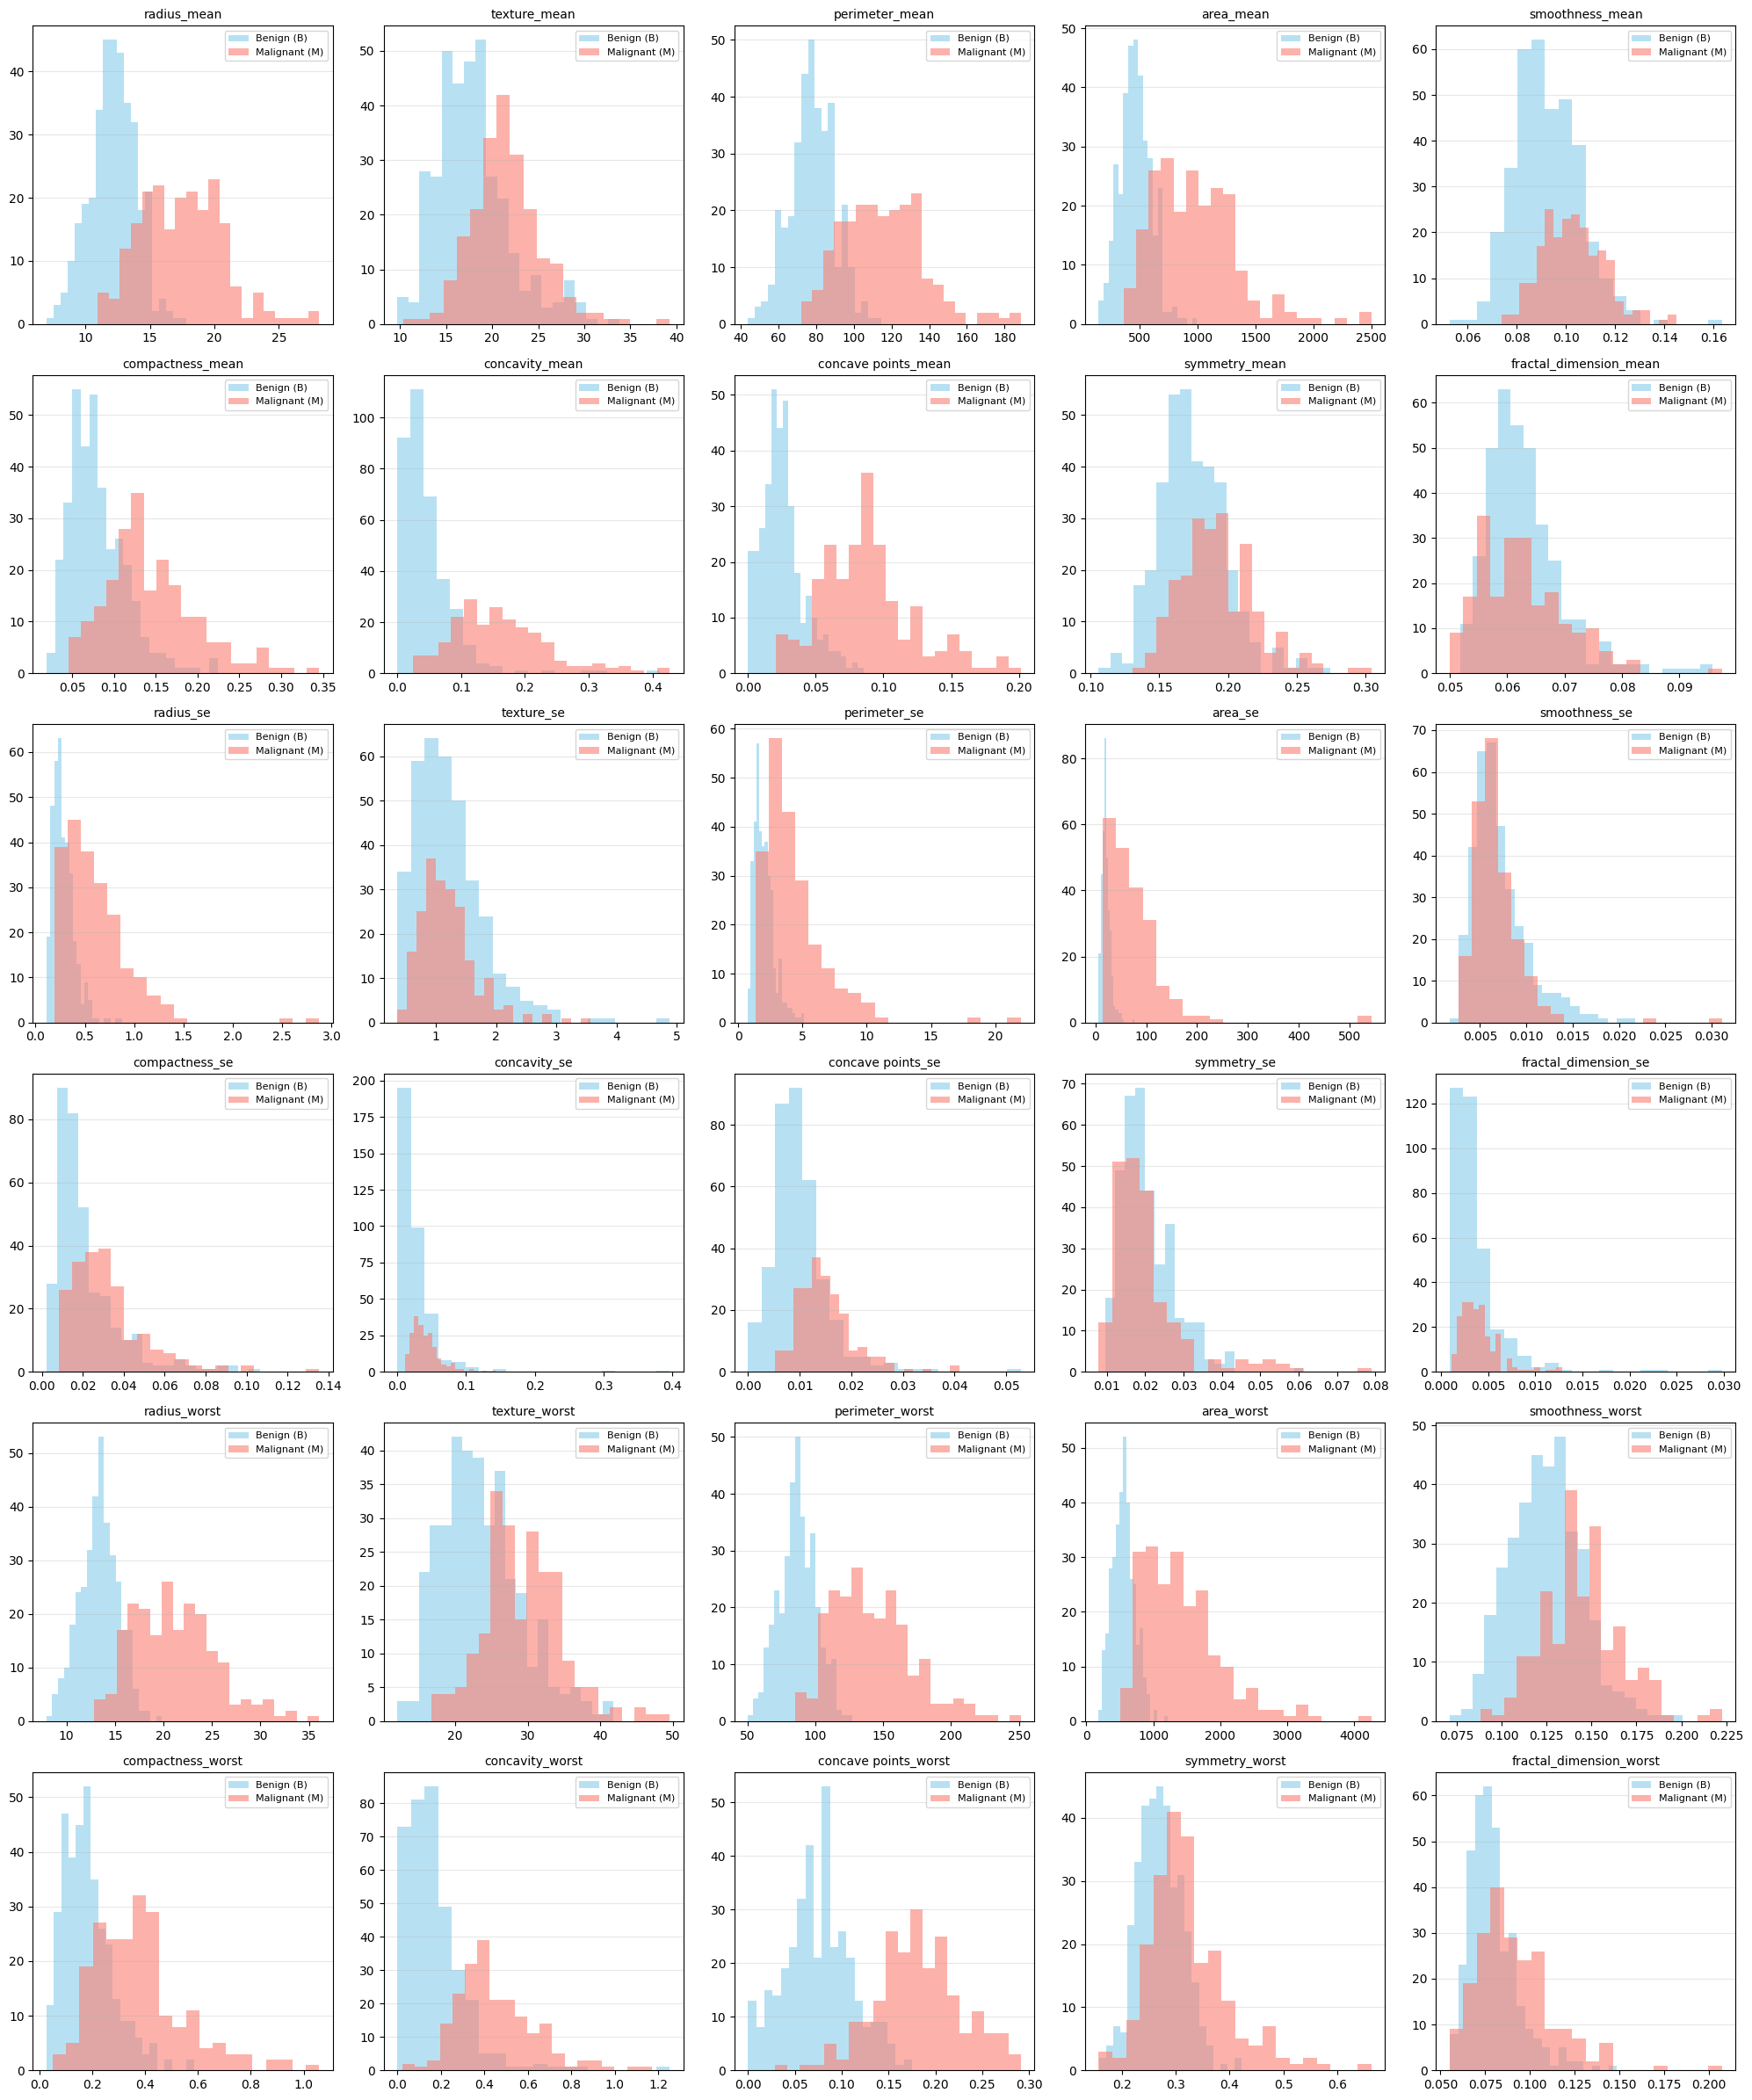

In [ ]:
cols_per_row = 5
num_columns = len(X.columns)


# Tạo khung hình tổng thể
fig, axes = plt.subplots(6, cols_per_row, figsize=(20, 4 * 6))
axes = axes.flatten()

for i, column in enumerate(X.columns):

    axes[i].hist(X[y == 0][column], bins=20, alpha=0.6, label='Benign (B)', color='skyblue')
    axes[i].hist(X[y == 1][column], bins=20, alpha=0.6, label='Malignant (M)', color='salmon')

    axes[i].set_title(f'{column}', fontsize=10)
    axes[i].legend(fontsize=8)
    axes[i].grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

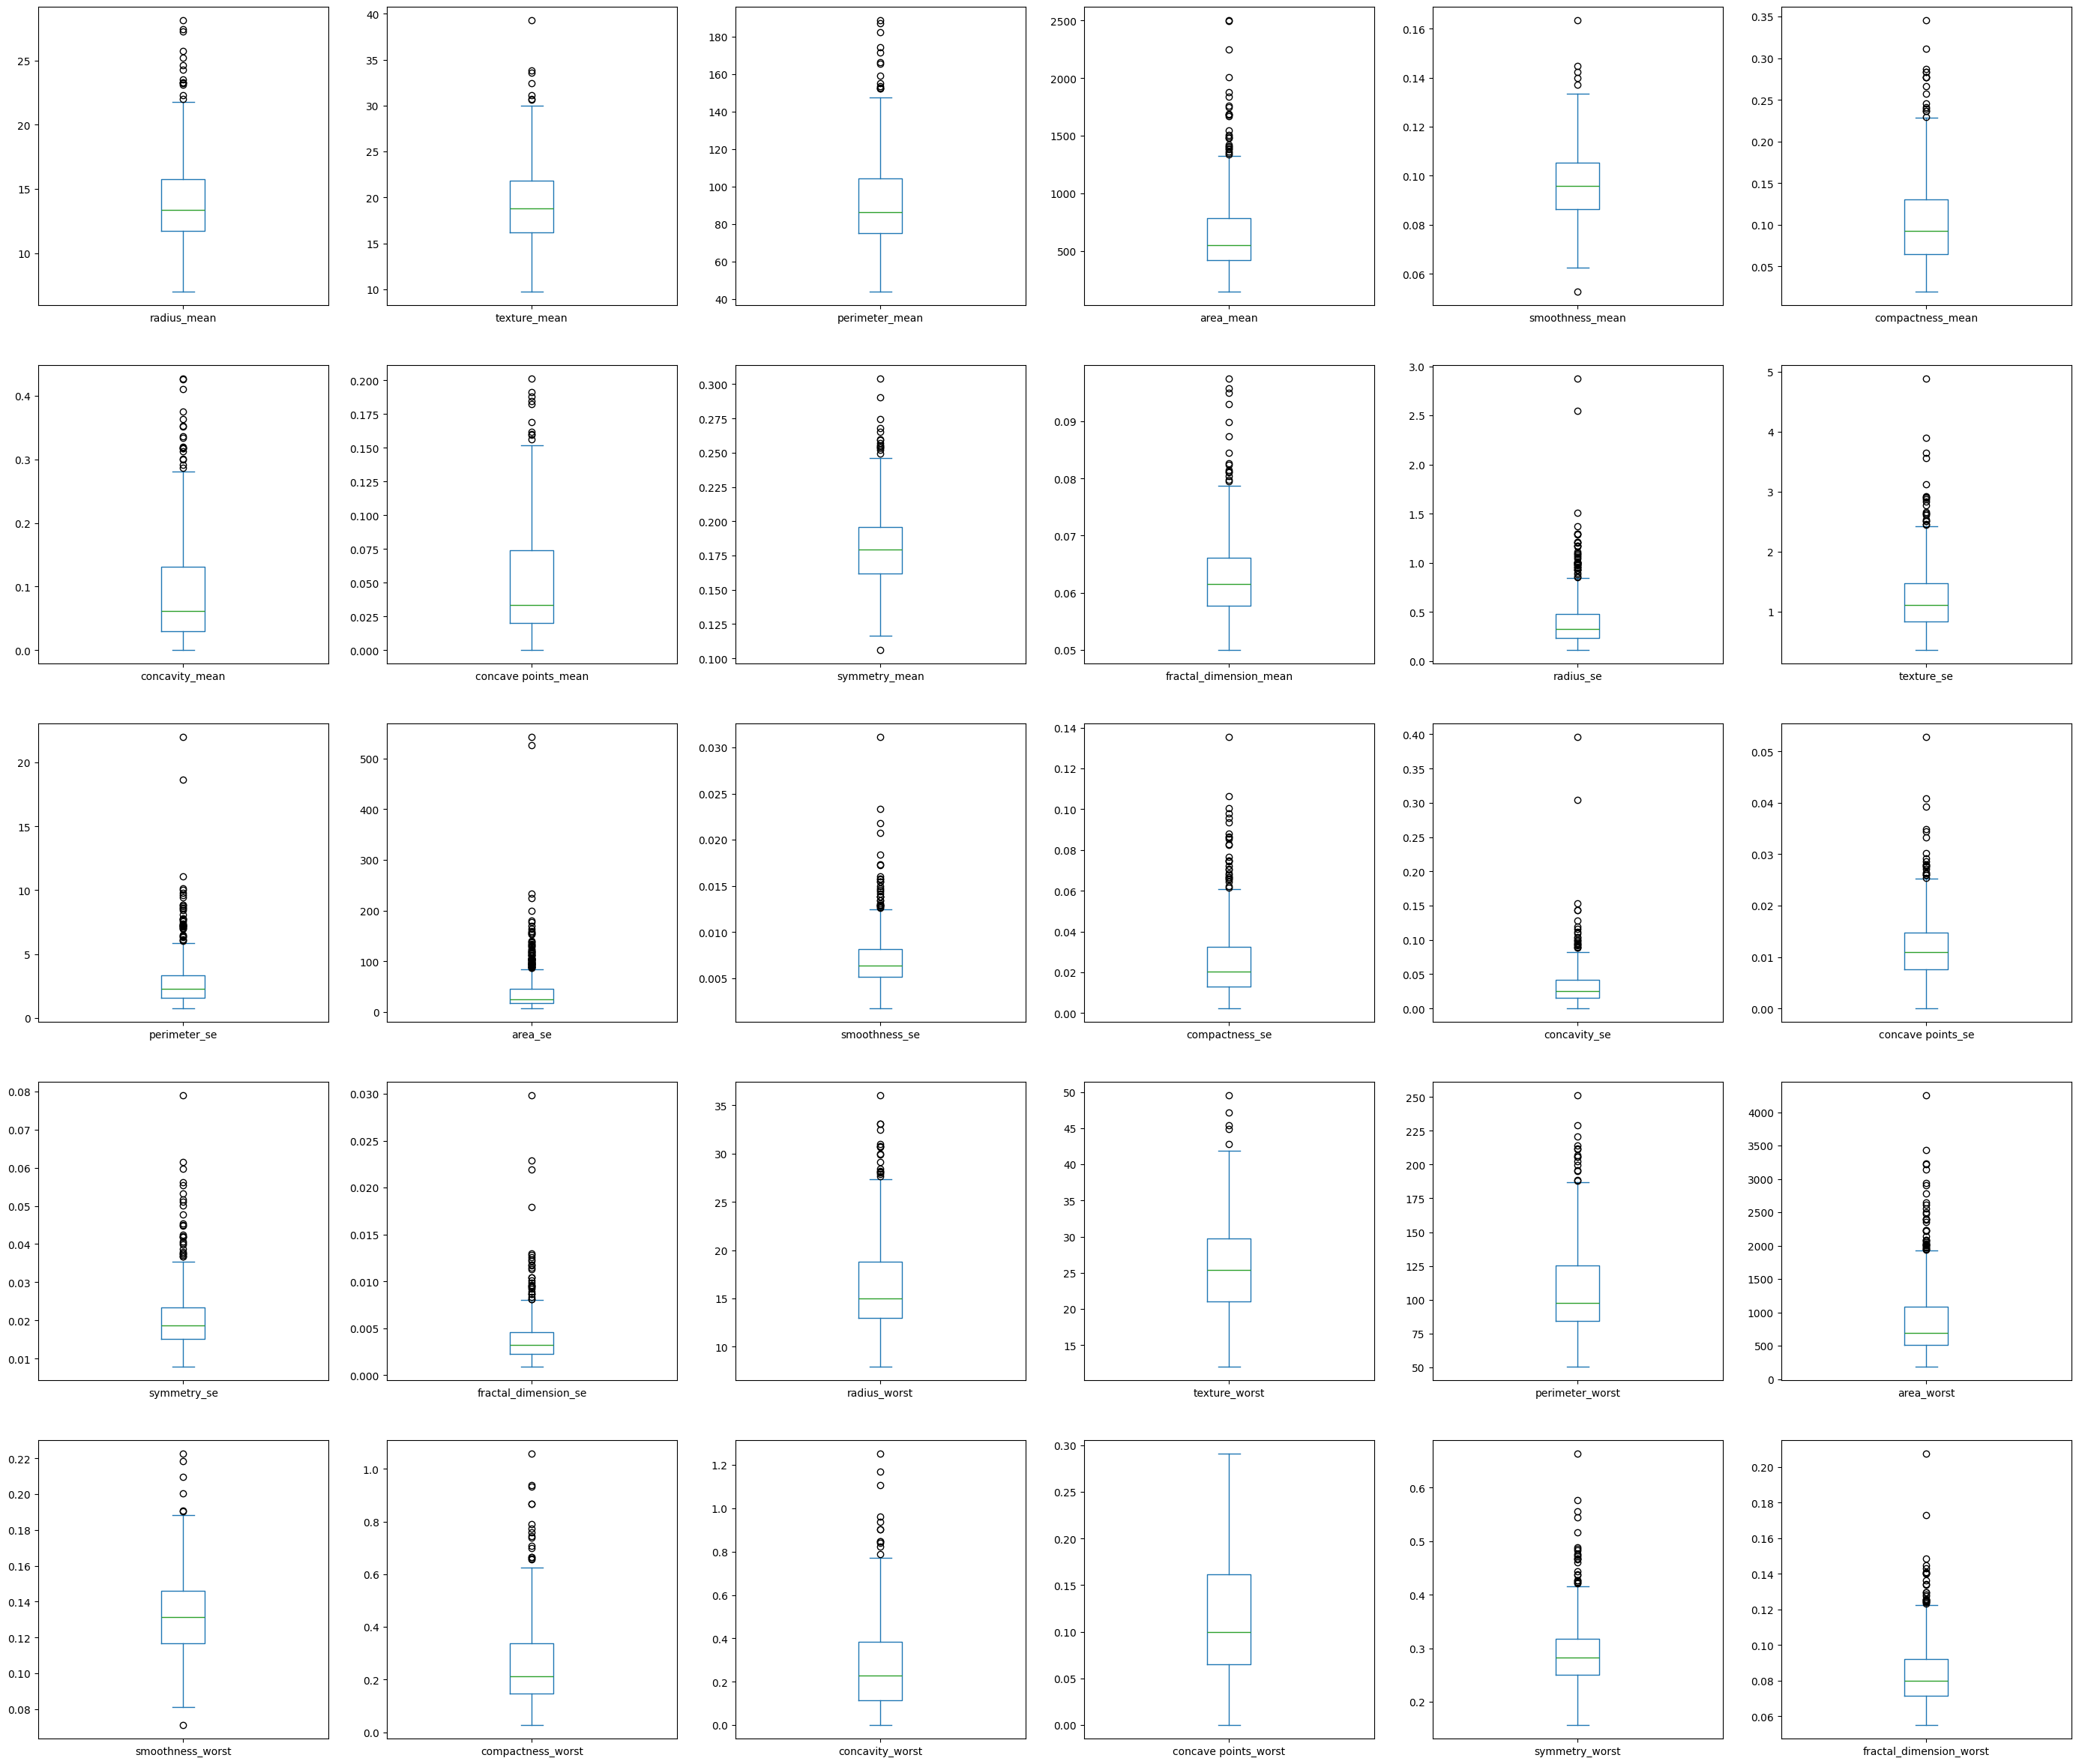

In [ ]:
X.plot(kind='box', subplots=True, layout=(5, 6), figsize=(35, 30))
plt.show()

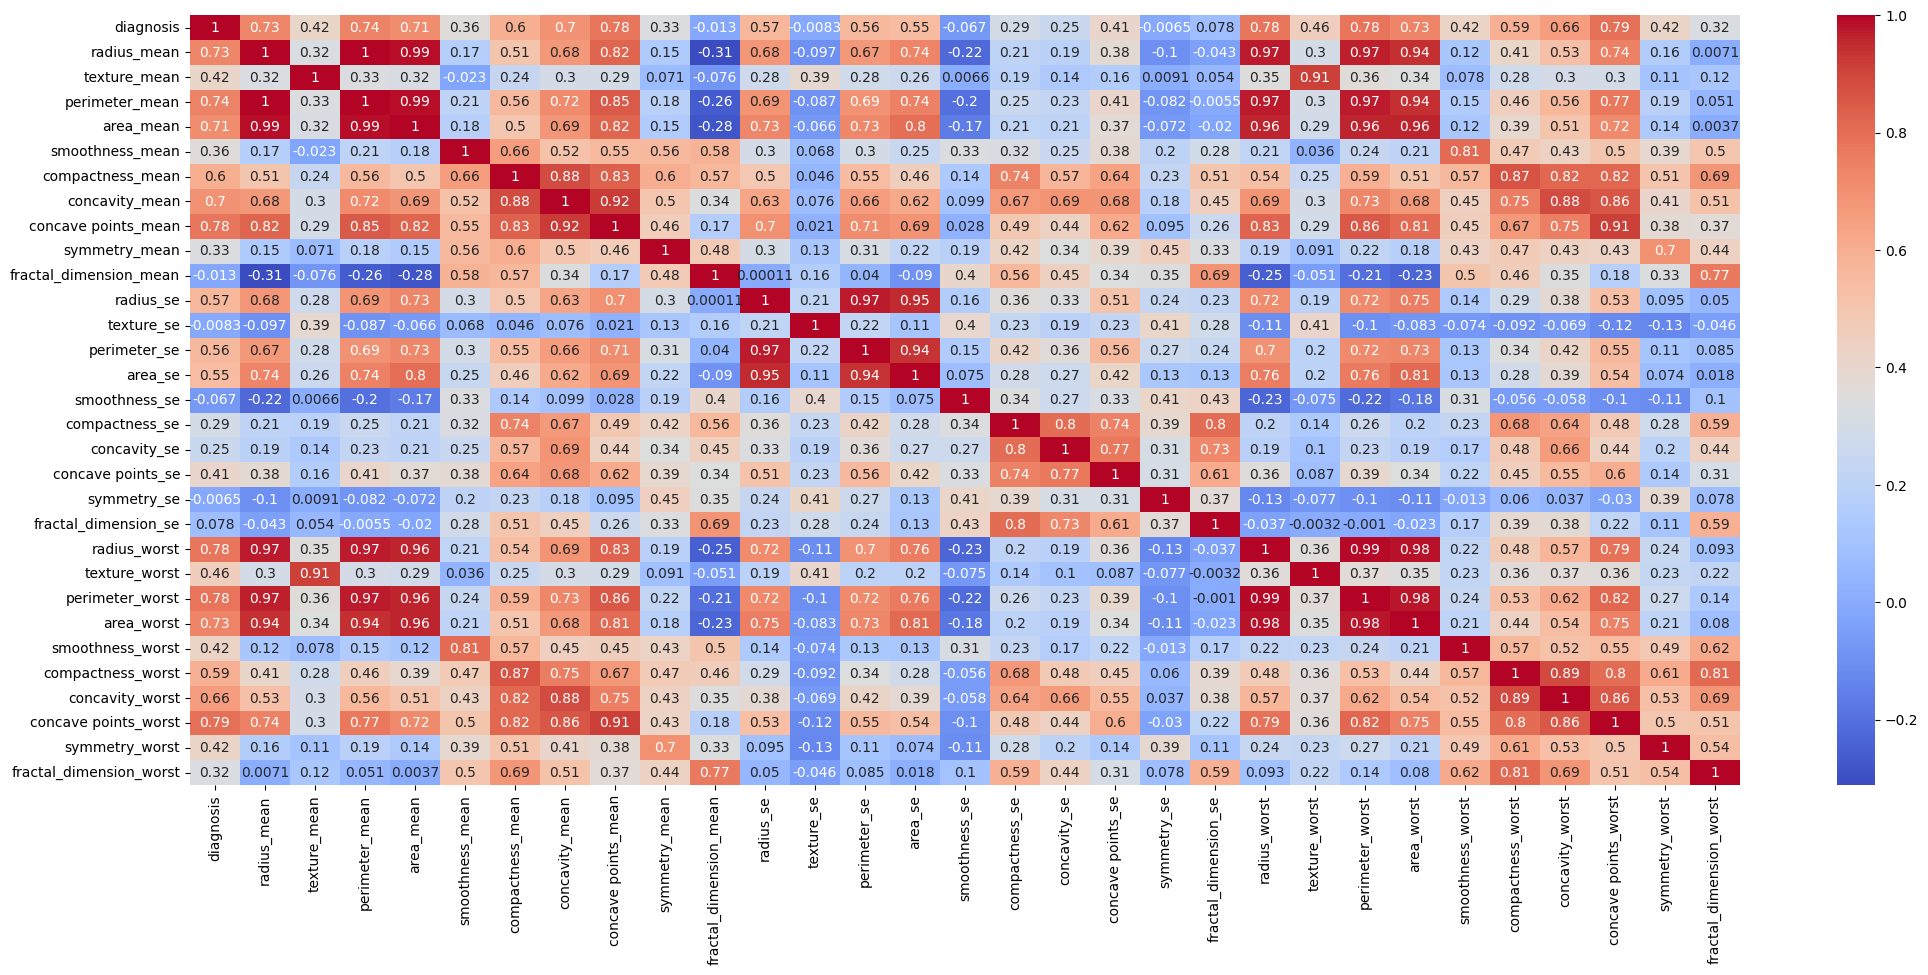

In [ ]:
# Correlation heat map
corr = df.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Data Preparation and Feature Engineering


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle = True, stratify=y)


In [ ]:
def handle_outliers_train_test(X_train, X_test):

    X_train_clean = X_train.copy()
    X_test_clean = X_test.copy()
    outlier_bounds = {}

    for column in X_train.columns:
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_bounds[column] = {'lower': float(lower_bound),'upper': float(upper_bound)}

        # Đếm outliers
        outliers_train = ((X_train[column] < lower_bound) |
                         (X_train[column] > upper_bound)).sum()
        outliers_test = ((X_test[column] < lower_bound) |
                        (X_test[column] > upper_bound)).sum()

        X_train_clean[column] = X_train[column].clip(lower_bound, upper_bound)
        X_test_clean[column] = X_test[column].clip(lower_bound, upper_bound)

        # In kết quả nếu có outliers
        if outliers_train > 0 or outliers_test > 0:
            print(f"{column}: Train outliers={outliers_train}, "
                  f"Test outliers={outliers_test}")


    return X_train_clean, X_test_clean, outlier_bounds

X_train, X_test, outlier_bounds = handle_outliers_train_test(X_train, X_test)

radius_mean: Train outliers=10, Test outliers=3
texture_mean: Train outliers=4, Test outliers=3
perimeter_mean: Train outliers=10, Test outliers=3
area_mean: Train outliers=18, Test outliers=5
smoothness_mean: Train outliers=4, Test outliers=2
compactness_mean: Train outliers=12, Test outliers=3
concavity_mean: Train outliers=15, Test outliers=3
concave points_mean: Train outliers=12, Test outliers=5
symmetry_mean: Train outliers=12, Test outliers=4
fractal_dimension_mean: Train outliers=12, Test outliers=3
radius_se: Train outliers=27, Test outliers=10
texture_se: Train outliers=14, Test outliers=6
perimeter_se: Train outliers=29, Test outliers=9
area_se: Train outliers=46, Test outliers=18
smoothness_se: Train outliers=18, Test outliers=12
compactness_se: Train outliers=25, Test outliers=7
concavity_se: Train outliers=18, Test outliers=6
concave points_se: Train outliers=18, Test outliers=6
symmetry_se: Train outliers=19, Test outliers=12
fractal_dimension_se: Train outliers=21, Test

In [ ]:
# Scale các biến
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training



In [ ]:
def validate_model_kfold(model, param_dist, X_input, y_input, n_splits, n_iter):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=skf,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        random_state = 42
    )

    search.fit(X_input, y_input)

    # Lấy index của best parameters
    best_index = search.best_index_
    print("\n")
    print("Chi tiết từng fold với bộ siêu tham số tốt nhất:")


    # Lấy f1 từng fold từ cv_results_
    fold_scores = []
    for fold in range(n_splits):
        fold_score = search.cv_results_[f'split{fold}_test_score'][best_index]
        fold_scores.append(fold_score)
        print(f"Fold {fold + 1}: f1 = {fold_score * 100:.2f}%")

    print("\n")
    print(f"Bộ siêu tham số tốt nhất: {search.best_params_}")

    # Fit best model với toàn bộ dữ liệu
    best_model = search.best_estimator_

    # Test model
    y_pred = best_model.predict(X_test_scaled)

    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # In kết quả
    print(f"\nCV f1 score: {search.best_score_:.2%}")
    print(f"Test f1 score: {f1 * 100:.2f}%")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

    return best_model



### Logistic Regression

In [ ]:
param_dist_lr = {
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'C': [0.001,0.01,0.1],
    'class_weight':["balanced"]
}

logistic_regression_model= validate_model_kfold(
    LogisticRegression(random_state = 42, max_iter= 1000),
    param_dist_lr,
    X_train_scaled,
    y_train,
    n_splits = 5,
    n_iter = 20)




Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(




Chi tiết từng fold với bộ siêu tham số tốt nhất:
Fold 1: f1 = 91.80%
Fold 2: f1 = 96.67%
Fold 3: f1 = 96.67%
Fold 4: f1 = 98.25%
Fold 5: f1 = 96.43%


Bộ siêu tham số tốt nhất: {'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.1}

CV f1 score: 95.96%
Test f1 score: 99.21%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.98      0.99        64

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Confusion Matrix:
 [[107   0]
 [  1  63]]


# Decision Tree

In [ ]:
 param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3,5,7],
    'min_samples_split': [3,5,7,10,20],
    'min_samples_leaf': [1,2,3,4,8]
 }

# Test lại bộ hyperparameters tốt nhất để xem kết quả từng fold
decision_tree = validate_model_kfold(
    DecisionTreeClassifier(random_state = 42),
    param_dist_dt,
    X_train_scaled,
    y_train,
    n_splits = 5,
    n_iter = 20)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Chi tiết từng fold với bộ siêu tham số tốt nhất:
Fold 1: f1 = 89.23%
Fold 2: f1 = 94.92%
Fold 3: f1 = 94.74%
Fold 4: f1 = 85.71%
Fold 5: f1 = 87.27%


Bộ siêu tham số tốt nhất: {'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy'}

CV f1 score: 90.37%
Test f1 score: 91.67%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       107
           1       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Confusion Matrix:
 [[106   1]
 [  9  55]]


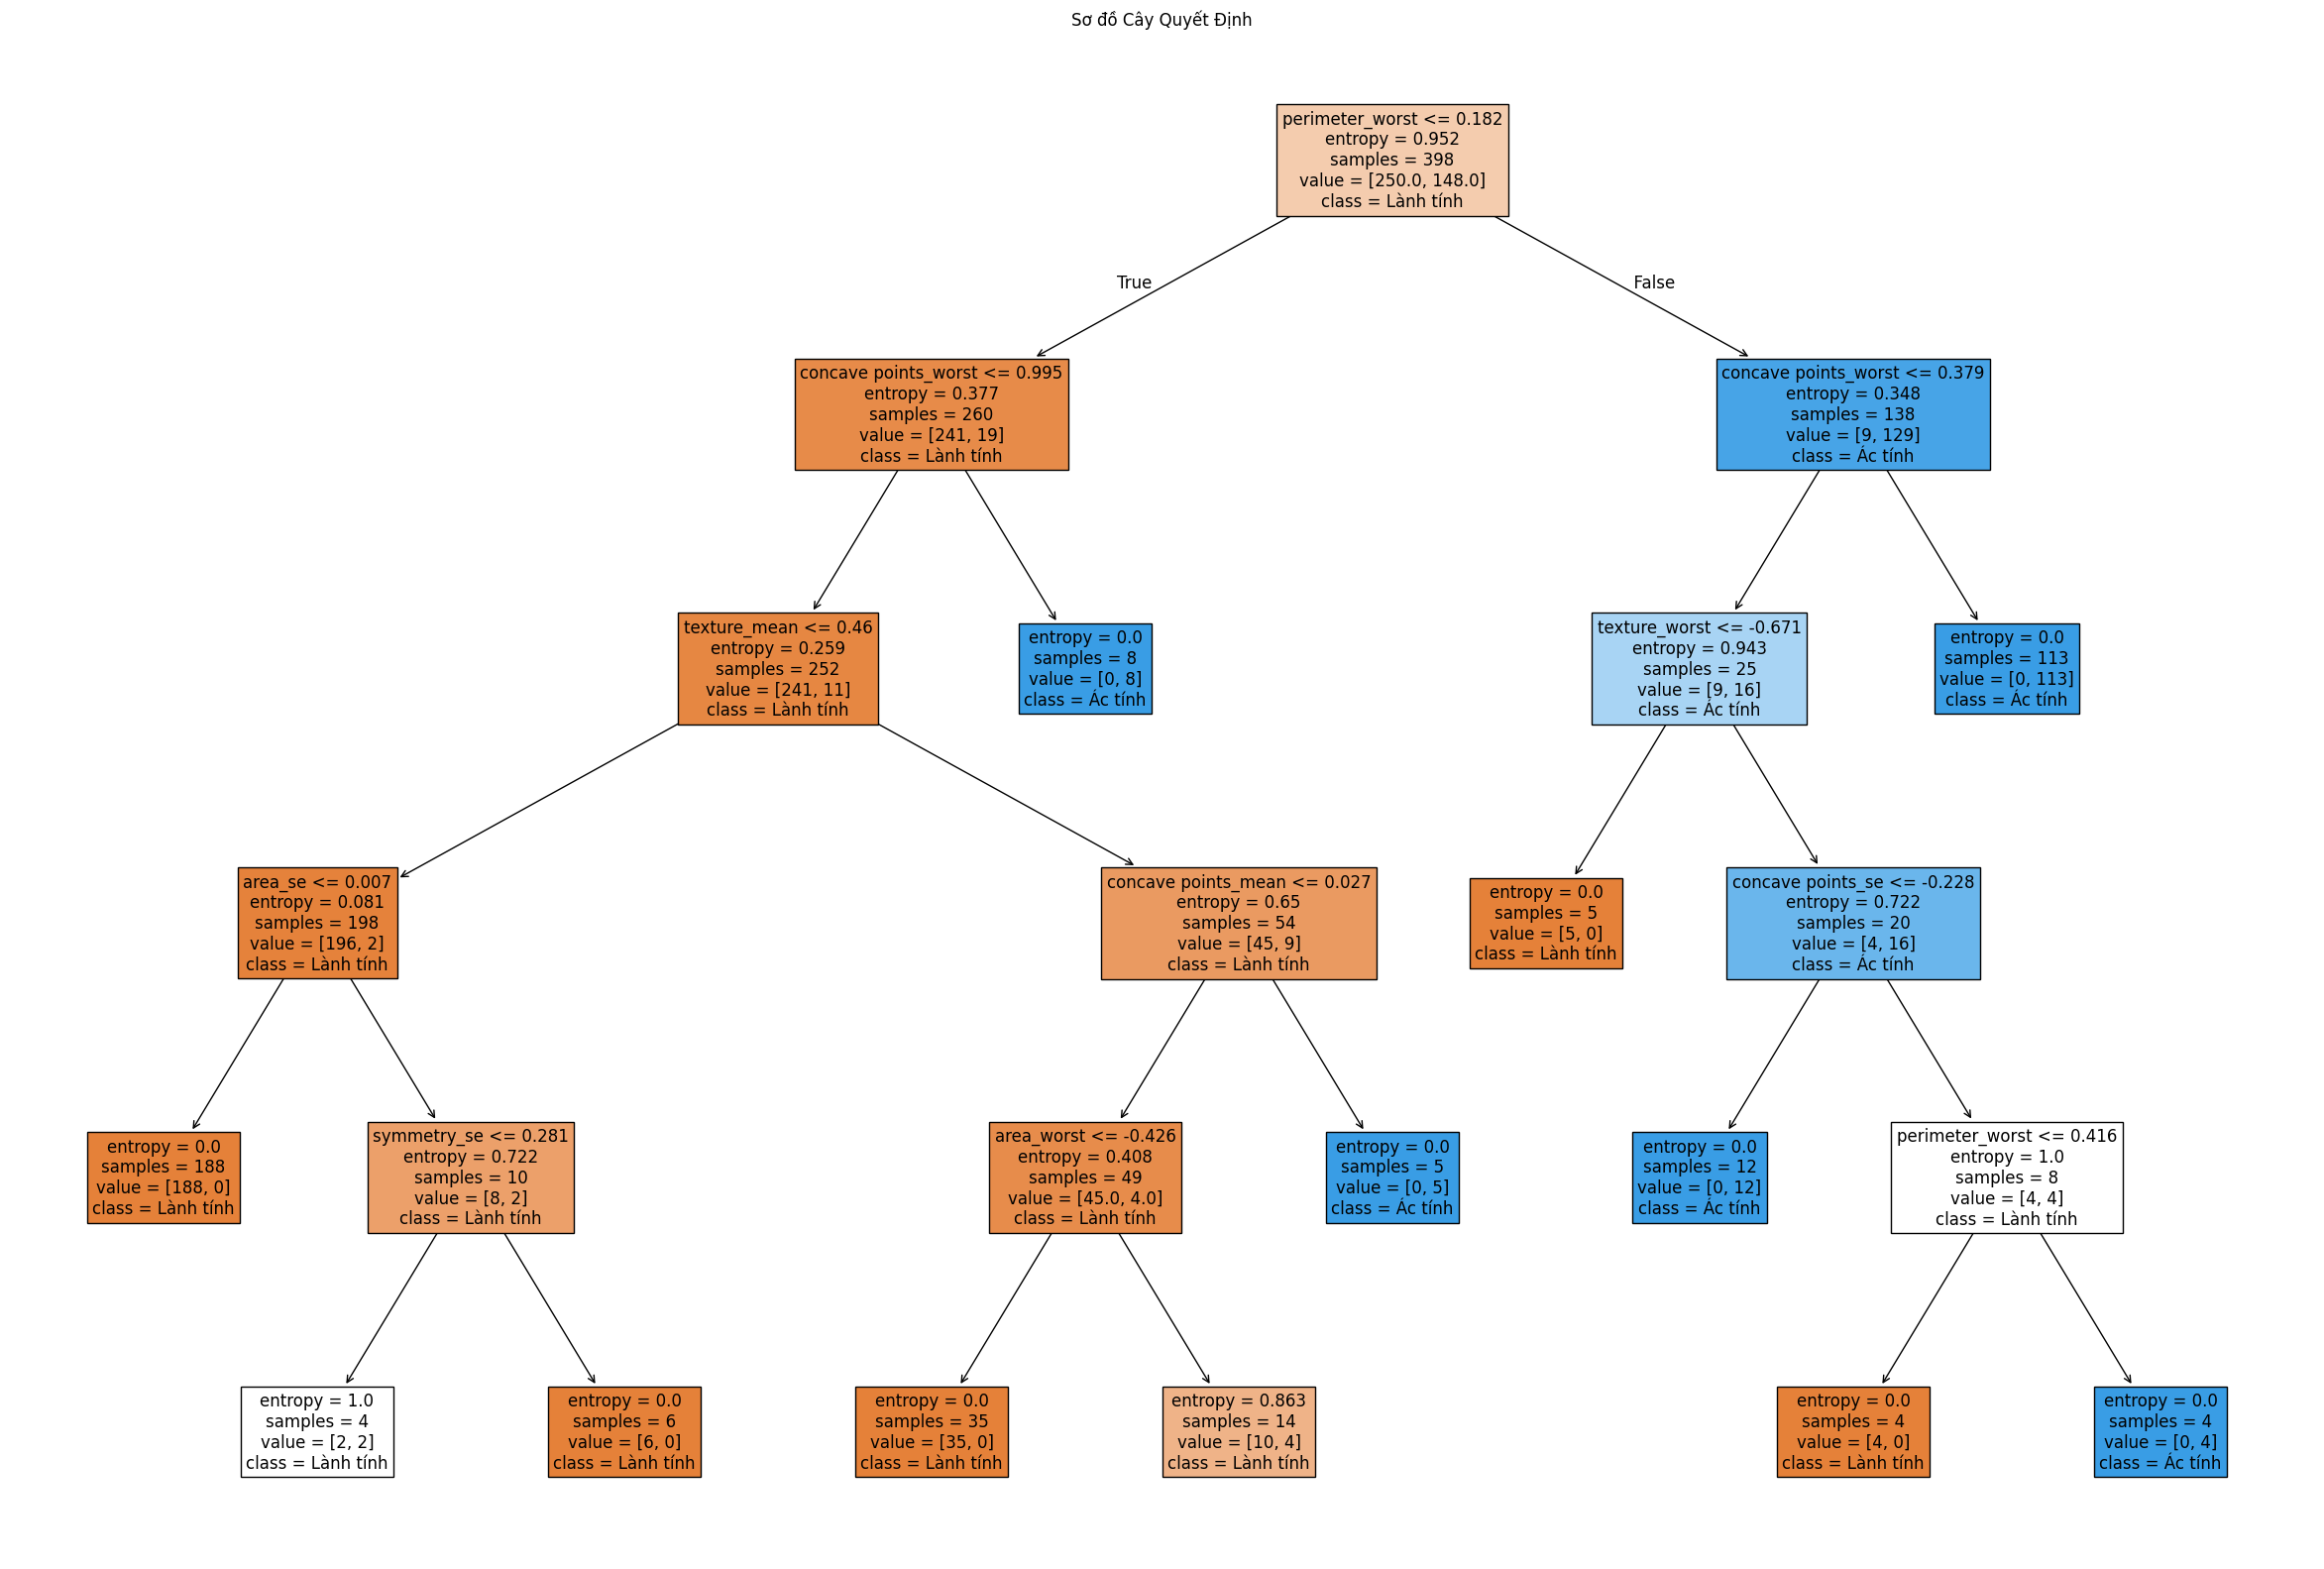

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(
    decision_tree,
    class_names=['Lành tính', 'Ác tính'],
    feature_names=X_train.columns,
    filled = True,
    fontsize=12
)
plt.title("Sơ đồ Cây Quyết Định")
plt.show()

# Triển khai mô hình

In [ ]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.1 MB/s eta 0:00:00


In [ ]:
! npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 2s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏npm notice
npm notice New major version of npm available! 10.8.2 -> 11.7.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.7.0
npm notice To update run: npm install -g npm@11.7.0
npm notice
⠏

In [ ]:
import joblib

# Khởi tạo model
final_model = logistic_regression_model

# Lưu cho Streamlit
joblib.dump(final_model, 'breast_cancer_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(X_train.columns.tolist(), 'feature_names.pkl')

joblib.dump(outlier_bounds, 'outlier_bounds.pkl')

print("Mô hình đã được huấn luyện xong và lưu thành file .pkl!")

Mô hình đã được huấn luyện xong và lưu thành file .pkl!
